In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt


In [2]:
M = np.arange(1,51) # matrix row number
S = np.arange(1,51) # sparsity
n = 50              # matrix col number

In [3]:
def generator_y(m, n, s):
  A = np.random.normal(loc = 0, scale = 1, size = (m, n))
  idx = np.arange(n)
  np.random.shuffle(idx)
  nonzero_idx = idx[:s]   # non-zero entries index
  x = np.zeros(n)
  x[nonzero_idx] = 1
  return A @ x, x, A

In [4]:
def Solve_LP(A, y):
  n = A.shape[1]

  A1 = np.hstack((A, -A))   # Matrix A1
  b1 = y                    # equailty constriants

  x = cvx.Variable(2 * n)
  obj = np.ones(2 * n) @ x

  prob = cvx.Problem(cvx.Minimize(obj),
                     [A1 @ x == b1, x >= 0])
  prob.solve()
  
  return prob.value, x.value
  

In [5]:
record = np.zeros((50, 50))
threshold = 1e-4

for i in range(50):
  for j in range(50):
    m = M[i]
    s = S[j]
    success = 0
    for iter in range(10):
      [y, x_star, A] = generator_y(m, n, s)
      [obj, x_opt] = Solve_LP(A, y)
      x_positive = x_opt[:50]
      x_negative = x_opt[50:]
      x = x_positive - x_negative
      success_signal = np.linalg.norm(x - x_star) / np.linalg.norm(x_star)
      if success_signal <= threshold:
        success += 1
    record[i][j] = success / 10




Text(0.5, 1.0, 'Success Rate')

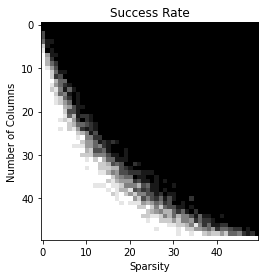

In [6]:
plt.imshow(record, cmap='gray')
plt.xlabel('Sparsity')
plt.ylabel('Number of Columns')
plt.title('Success Rate')